<h1 style="text-align:center;">Can Money Buy Power?</h1><br>
<h2>An analysis on Elections Data in R</h2>
<br>
<h3>Methods used : Random Forest, Artificial Neural Network</h3>
<h2 style="text-align:right;">Sthanu Ramakrishnan</h2>

In [1]:
# Reading the data
data <- read.csv("election_campaign_data.csv"
                            , sep=","
                            , header = TRUE
                            , strip.white = TRUE
                            , na.strings = c("NA","","NaN","?","")
                            )
# Meta Data : http://www.fec.gov/finance/disclosure/metadata/DataDictionaryWEBALL.shtml#search=%22trans_from_auth%22 

In [2]:
# To display all the columns of the dataset in Jupyter Notebook
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [3]:
head(data)

cand_id   last_name first_name      twitterbirth twitter facebookdate
1 H8CA41113 MEAGHER   PATRICK HAROLD  NA           0       NA          
2 H8IL12079 JENNINGS  RODGER W.       NA           0       NA          
3 H0VA08149 MURRAY    J PATRICK       NA           0       NA          
4 H6TX15113 ZAMORA    EDDIE           NA           0       NA          
5 H0AK00089 CRAWFORD  HARRY T JR      2/21/14      0       10/20/09    
6 H0FL07077 BEAVEN    HEATHER MAURINE NA           0       NA          
  facebook facebookjan youtubebirth youtube cand_ici cand_pty_affiliation
1 0        0           NA           0       C        DEM                 
2 0        0           NA           0       C        GRE                 
3 0        0           NA           0       C        REP                 
4 0        0           NA           0       C        REP                 
5 1        1           NA           0       C        DEM                 
6 0        0           NA           0       C        DEM                 
  ttl_receipts trans_from_auth ttl_disb  trans_to_auth coh_bop coh_cop  
1  48278.52    0                48418.03 0             131.53      -7.98
2    445.00    0                  249.00 0             138.00     277.00
3 446468.16    0               442922.50 0               0.00    7120.68
4  87768.00    0                83938.88 0             754.67  -12456.34
5 240439.23    0               235571.44 0               0.00    4867.81
6 239084.08    0               235849.91 0               0.00    2707.84
  cand_contrib cand_loans other_loans cand_loan_repay other_loan_repay
1 5956.62       9133.73   0           5558.25         0               
2    0.00          0.00   0              0.00         0               
3 6872.53      35000.00   0              0.00         0               
4 3330.00          0.00   0              0.00         0               
5 5832.41          0.00   0              0.00         0               
6    0.00          0.00   0              0.00         0               
  debts_owed_by ttl_indiv_contrib other_pol_cmte_contrib pol_pty_contrib
1  3575.48       25583.2           6934.75                500.00        
2     0.00         445.0              0.00                  0.00        
3 45000.00      373778.6          29417.01               1400.00        
4     0.00       84338.0            100.00                  0.00        
5  5000.00      214136.6          14200.00               1749.99        
6    49.54      198615.7          34700.00               5000.00        
  indiv_refunds cmte_refunds opp_fund  age gender gen_election
1   0             0           688155.1 75  M      L           
2   0             0          1398240.4 60  M      L           
3 200             0          1312116.6 64  M      L           
4   0             0           609897.9 69  M      L           
5 850           500          1001015.4 76  M      L           
6 350             0          1205985.1 66  M      L

In [4]:
dim(data)

[1] 941  33

In [5]:
# 4. Dropping Columns that are not required
columns_to_be_dropped <- c("cand_id", "last_name", "first_name", "twitterbirth", "facebookdate", "facebookjan", "youtubebirth")
data <- data[,!(names(data) %in% columns_to_be_dropped)]

In [6]:
#Alternatively to delete columns, use the following code
data$cand_id = NULL
data$last_name = NULL
data$first_name = NULL
data$twitterbirth = NULL
data$facebookdate = NULL
data$facebookjan = NULL
data$youtubebirth = NULL

In [7]:
# Finding the Number of rows and columns of the dataset
dim(data)

[1] 941  26

In [8]:
summary(data)

    twitter          facebook         youtube       cand_ici
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   C:452   
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   I:398   
 Median :0.0000   Median :0.0000   Median :0.0000   O: 91   
 Mean   :0.2136   Mean   :0.2604   Mean   :0.2561           
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000           
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000           
                                                            
 cand_pty_affiliation  ttl_receipts      trans_from_auth      ttl_disb       
 REP    :424          Min.   :       0   Min.   :      0   Min.   :       0  
 DEM    :389          1st Qu.:   88848   1st Qu.:      0   1st Qu.:   86440  
 IND    : 42          Median :  810054   Median :      0   Median :  790374  
 LIB    : 29          Mean   : 1015225   Mean   :  11405   Mean   : 1009054  
 OTH    : 14          3rd Qu.: 1519582   3rd Qu.:      0   3rd Qu.: 1440465  
 UNK    :  9          Max.   :13567811   Max

In [9]:
# Changing necessary columns as categorical variables
data$twitter <- as.factor(data$twitter)
data$facebook <- as.factor(data$facebook)
data$youtube <- as.factor(data$youtube)
data$cand_ici <- as.factor(data$cand_ici)
data$gen_election <- as.factor(data$gen_election)

In [10]:
summary(data)

 twitter facebook youtube cand_ici cand_pty_affiliation  ttl_receipts     
 0:740   0:696    0:700   C:452    REP    :424          Min.   :       0  
 1:201   1:245    1:241   I:398    DEM    :389          1st Qu.:   88848  
                          O: 91    IND    : 42          Median :  810054  
                                   LIB    : 29          Mean   : 1015225  
                                   OTH    : 14          3rd Qu.: 1519582  
                                   UNK    :  9          Max.   :13567811  
                                   (Other): 34                            
 trans_from_auth      ttl_disb        trans_to_auth        coh_bop       
 Min.   :      0   Min.   :       0   Min.   :      0   Min.   :  -4655  
 1st Qu.:      0   1st Qu.:   86440   1st Qu.:      0   1st Qu.:      0  
 Median :      0   Median :  790374   Median :      0   Median :     88  
 Mean   :  11405   Mean   : 1009054   Mean   :   9514   Mean   : 163807  
 3rd Qu.:      0   3rd Qu.: 14

In [11]:
# List Number of records with missing values in each variable
colSums(is.na(data))

twitter               facebook                youtube 
                     0                      0                      0 
              cand_ici   cand_pty_affiliation           ttl_receipts 
                     0                      0                      0 
       trans_from_auth               ttl_disb          trans_to_auth 
                     0                      0                      0 
               coh_bop                coh_cop           cand_contrib 
                     0                      0                      0 
            cand_loans            other_loans        cand_loan_repay 
                     0                      0                      0 
      other_loan_repay          debts_owed_by      ttl_indiv_contrib 
                     0                      0                      0 
other_pol_cmte_contrib        pol_pty_contrib          indiv_refunds 
                     0                      0                      0 
          cmte_refunds               opp_fund                    age 
                     0                      0                     12 
                gender           gen_election 
                    12                      0

In [12]:
complete.cases(data)

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[121]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[145]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[157]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[169]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[181]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[193]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[205] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[217]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[229]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[253]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
[265]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[277]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[289]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[313]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[325]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[337]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[349]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[361]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[373]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[385]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[397]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[409]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[421]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[433]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[445]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[457]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[469]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[481]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[493]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[505]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[517]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[529]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[541]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[553]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[565]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[577]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[589]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[601]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[613]  TRUE  TRUE  TRUE 

In [13]:
# 7. Removing observations with missing values
data <- data[complete.cases(data), ]

In [14]:
dim(data)

[1] 929  26

In [15]:
colSums(is.na(data))

twitter               facebook                youtube 
                     0                      0                      0 
              cand_ici   cand_pty_affiliation           ttl_receipts 
                     0                      0                      0 
       trans_from_auth               ttl_disb          trans_to_auth 
                     0                      0                      0 
               coh_bop                coh_cop           cand_contrib 
                     0                      0                      0 
            cand_loans            other_loans        cand_loan_repay 
                     0                      0                      0 
      other_loan_repay          debts_owed_by      ttl_indiv_contrib 
                     0                      0                      0 
other_pol_cmte_contrib        pol_pty_contrib          indiv_refunds 
                     0                      0                      0 
          cmte_refunds               opp_fund                    age 
                     0                      0                      0 
                gender           gen_election 
                     0                      0

In [16]:
# Alternative way to remove records with missing values
data <- na.omit(data)

In [17]:
dim(data)

[1] 929  26

In [18]:
#Getting Indexes for test dataset, Size = 30% of the data. 
# Since we require 70% of the data for training, keeping only 0.3
set.seed(32)
indexes = sample(1:nrow(data), size=0.3*nrow(data), replace=FALSE)

# Alternatively, we can create indexes for train data where we will be creating indexes for 70% instead of 30%
# indexes = sample(1:nrow(data), size=0.7*nrow(data), replace=FALSE)

In [19]:
# Split data
test_data = data[indexes,]
dim(test_data)
train_data = data[-indexes,]
dim(train_data)

[1] 278  26

[1] 651  26

In [20]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 3.5.2"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [21]:
set.seed(32)
#randomForest parameters : 1st parameter = dependent_variable~. (. means all) ntree = Number of Decision Trees
rf10 <-randomForest(gen_election~., data=train_data, ntree=10, na.action=na.exclude, importance=T,
                  proximity=T) 
print(rf10)


Call:
 randomForest(formula = gen_election ~ ., data = train_data, ntree = 10,      importance = T, proximity = T, na.action = na.exclude) 
               Type of random forest: classification
                     Number of trees: 10
No. of variables tried at each split: 5

        OOB estimate of  error rate: 7.91%
Confusion matrix:
    L   W class.error
L 317  24  0.07038123
W  27 277  0.08881579


In [22]:
set.seed(32)
rf20 <-randomForest(gen_election~., data=train_data, ntree=20, na.action=na.exclude, importance=T,
                  proximity=T)

In [23]:
set.seed(32)
rf30 <-randomForest(gen_election~., data=train_data, ntree=30, na.action=na.exclude, importance=T,
                  proximity=T)

In [24]:
set.seed(32)
rf40 <-randomForest(gen_election~., data=train_data, ntree=40, na.action=na.exclude, importance=T,
                  proximity=T)

In [25]:
set.seed(32)
rf50 <-randomForest(gen_election~., data=train_data, ntree=50, na.action=na.exclude, importance=T,
                  proximity=T)

In [26]:
set.seed(32)
rf60 <-randomForest(gen_election~., data=train_data, ntree=60, na.action=na.exclude, importance=T,
                  proximity=T)

In [27]:
set.seed(32)
rf70 <-randomForest(gen_election~., data=train_data, ntree=70, na.action=na.exclude, importance=T,
                  proximity=T)

In [28]:
set.seed(32)
rf80 <-randomForest(gen_election~., data=train_data, ntree=80, na.action=na.exclude, importance=T,
                  proximity=T)

In [29]:
set.seed(32)
rf90 <-randomForest(gen_election~., data=train_data, ntree=90, na.action=na.exclude, importance=T,
                  proximity=T)

In [30]:
set.seed(32)
rf100 <-randomForest(gen_election~., data=train_data, ntree=100, na.action=na.exclude, importance=T,
                  proximity=T)

In [31]:
set.seed(32)
rf110 <-randomForest(gen_election~., data=train_data, ntree=110, na.action=na.exclude, importance=T,
                  proximity=T)

In [32]:
rf110


Call:
 randomForest(formula = gen_election ~ ., data = train_data, ntree = 110,      importance = T, proximity = T, na.action = na.exclude) 
               Type of random forest: classification
                     Number of trees: 110
No. of variables tried at each split: 5

        OOB estimate of  error rate: 4.92%
Confusion matrix:
    L   W class.error
L 319  24  0.06997085
W   8 300  0.02597403

In [33]:
Tree_Count <- c(rf10$ntree, rf20$ntree, rf30$ntree, rf40$ntree, rf50$ntree, rf60$ntree, rf70$ntree, rf80$ntree, rf90$ntree, rf100$ntree, rf110$ntree)

Variable_Count <- c(
                 rf10$mtry,
                 rf20$mtry,
                 rf30$mtry,
                 rf40$mtry,
                 rf50$mtry,
                 rf60$mtry,
                 rf70$mtry,
                 rf80$mtry,
                 rf90$mtry,
                 rf100$mtry,
                 rf110$mtry)

OOB <- c(
         rf10$err.rate[rf10$ntree,1]*100, 
         rf20$err.rate[rf20$ntree,1]*100, 
         rf30$err.rate[rf30$ntree,1]*100, 
         rf40$err.rate[rf40$ntree,1]*100, 
         rf50$err.rate[rf50$ntree,1]*100, 
         rf60$err.rate[rf60$ntree,1]*100,
         rf70$err.rate[rf70$ntree,1]*100,
         rf80$err.rate[rf80$ntree,1]*100,
         rf90$err.rate[rf90$ntree,1]*100,
         rf100$err.rate[rf100$ntree,1]*100,
         rf110$err.rate[rf110$ntree,1]*100)

results <- matrix(c(Tree_Count, Variable_Count, OOB), byrow = FALSE, ncol = 3)

colnames(results) <- c('Tree_Count', 'Variable_Count', 'OOB')
results

Tree_Count Variable_Count OOB     
 [1,]  10        5              7.906977
 [2,]  20        5              7.219662
 [3,]  30        5              6.451613
 [4,]  40        5              6.144393
 [5,]  50        5              5.990783
 [6,]  60        5              5.529954
 [7,]  70        5              4.761905
 [8,]  80        5              4.915515
 [9,]  90        5              4.915515
[10,] 100        5              4.761905
[11,] 110        5              4.915515

<b>When Number of trees = 70, the OOB error reached its best minimum before increasing again. Therefore, I recommend 70 trees.</b>

mtry = 5  OOB error = 5.38% 
Searching left ...
mtry = 4 	OOB error = 7.07% 
-0.3142857 0.01 
Searching right ...
mtry = 7 	OOB error = 5.38% 
0 0.01 


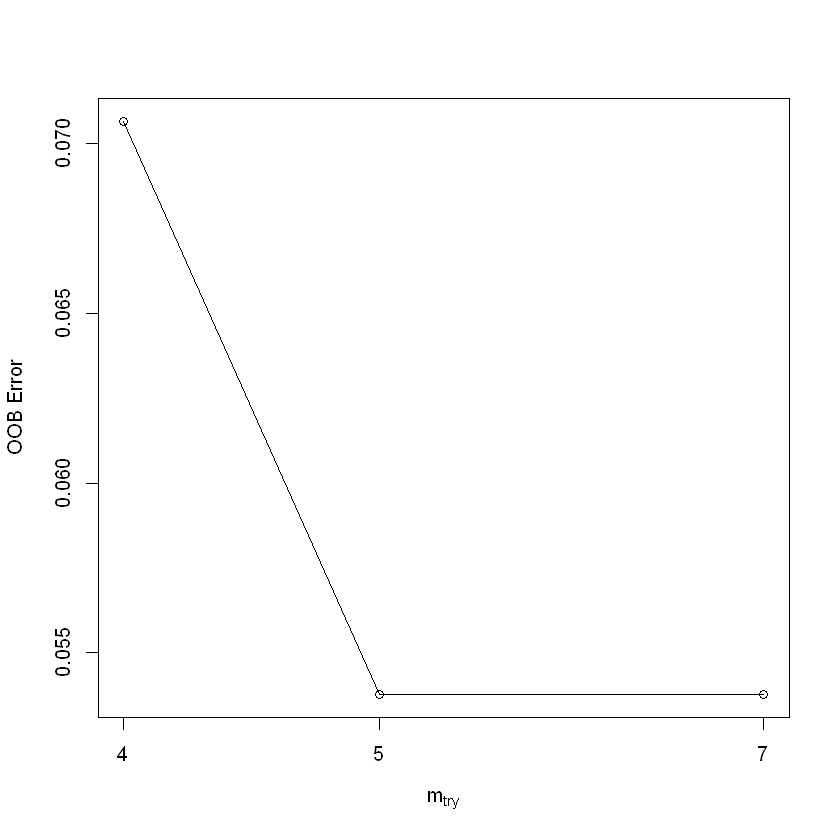

In [34]:
# Finding the best variable count (mtry)
mtry <- tuneRF(train_data[-grep("gen_election", colnames(train_data))]
               , train_data$gen_election
               , ntreeTry=70
               , stepFactor=1.5
               , improve=0.01
               , trace=TRUE
               , plot=TRUE
               , na.action=na.exclude)

In [35]:
best.m <- mtry[mtry[, 2] == min(mtry[, 2]), 1]

print(mtry)
print(best.m)

      mtry   OOBError
4.OOB    4 0.07066052
5.OOB    5 0.05376344
7.OOB    7 0.05376344
5.OOB 7.OOB 
    5     7 


<b>Best mtry is 5 with OOB error of 5.38%</b>

In [36]:
set.seed(32)
rf_final <-randomForest(gen_election~.
                        , data=train_data
                        , ntree=50
                        , na.action=na.exclude
                        , importance=T
                        , proximity=T
                        , mtry=best.m)
print(rf_final)


Call:
 randomForest(formula = gen_election ~ ., data = train_data, ntree = 50,      importance = T, proximity = T, mtry = best.m, na.action = na.exclude) 
               Type of random forest: classification
                     Number of trees: 50
No. of variables tried at each split: 5

        OOB estimate of  error rate: 5.99%
Confusion matrix:
    L   W class.error
L 316  27  0.07871720
W  12 296  0.03896104


In [37]:
# Shows the spliting of the first Decision Tree
getTree(rf_final, 1)
# https://stackoverflow.com/questions/14996619/random-forest-output-interpretation
#Split var 23 is the root node

left daughter right daughter split var split point status prediction
1   2             3             19         113295.730  1     0         
2   4             5             23         156068.883  1     0         
3   6             7              2              1.000  1     0         
4   0             0              0              0.000 -1     2         
5   8             9             17         334337.015  1     0         
6  10            11             20           2686.605  1     0         
7   0             0              0              0.000 -1     2         
8  12            13             24             74.500  1     0         
9  14            15             21           1754.310  1     0         
10 16            17             18         785250.405  1     0         
11 18            19             13           3425.000  1     0         
12  0             0              0              0.000 -1     1         
13 20            21              8         475630.110  1     0         
14  0             0              0              0.000 -1     1         
15  0             0              0              0.000 -1     2         
16  0             0              0              0.000 -1     2         
17 22            23             25              1.000  1     0         
18 24            25             11          74166.761  1     0         
19 26            27             22           1252.500  1     0         
20  0             0              0              0.000 -1     1         
21 28            29             12           4650.000  1     0         
22 30            31              9          12550.000  1     0         
23 32            33             15          38000.000  1     0         
24 34            35             11          11641.675  1     0         
25 36            37             23         810896.065  1     0         
26 38            39             19         245955.425  1     0         
27 40            41             11          30840.214  1     0         
28  0             0              0              0.000 -1     2         
29  0             0              0              0.000 -1     1         
30  0             0              0              0.000 -1     1         
31  0             0              0              0.000 -1     2         
32 42            43              4              1.000  1     0         
33  0             0              0              0.000 -1     2         
34  0             0              0              0.000 -1     1         
35 44            45              8        2212360.700  1     0         
36  0             0              0              0.000 -1     2         
37 46            47              7          43213.132  1     0         
38  0             0              0              0.000 -1     1         
39 48            49             19         511807.580  1     0         
40  0             0              0              0.000 -1     2         
41  0             0              0              0.000 -1     1         
42  0             0              0              0.000 -1     1         
43 50            51             23        1605096.650  1     0         
44 52            53              7          24907.511  1     0         
45  0             0              0              0.000 -1     1         
46  0             0              0              0.000 -1     1         
47  0             0              0              0.000 -1     2         
48  0             0              0              0.000 -1     2         
49  0             0              0              0.000 -1     1         
50 54            55             12           2400.000  1     0         
51  0             0              0              0.000 -1     1         
52  0             0              0              0.000 -1     2         
53  0             0              0              0.000 -1     1         
54  0             0              0              0.000 -1     2         
55  0             0              0         

In [38]:
# Proximity between all the observations
rf_final$proximity

1          4         5          6          9          10        11        
1   1.00000000 1.0000000 0.9090909  0.90909091 1.00000000 1.0000000 0.90909091
4   1.00000000 1.0000000 0.8571429  0.90000000 1.00000000 1.0000000 0.90000000
5   0.90909091 0.8571429 1.0000000  1.00000000 0.88888889 0.8750000 0.70000000
6   0.90909091 0.9000000 1.0000000  1.00000000 1.00000000 1.0000000 0.81818182
9   1.00000000 1.0000000 0.8888889  1.00000000 1.00000000 1.0000000 1.00000000
10  1.00000000 1.0000000 0.8750000  1.00000000 1.00000000 1.0000000 1.00000000
11  0.90909091 0.9000000 0.7000000  0.81818182 1.00000000 1.0000000 1.00000000
12  1.00000000 0.8750000 0.8888889  0.90909091 1.00000000 1.0000000 1.00000000
13  0.75000000 1.0000000 0.8333333  0.90000000 1.00000000 1.0000000 1.00000000
14  1.00000000 1.0000000 0.7777778  0.87500000 1.00000000 1.0000000 1.00000000
17  1.00000000 0.7500000 0.8888889  0.90909091 1.00000000 1.0000000 0.88888889
19  0.83333333 0.8333333 0.7272727  0.85714286 1.00000000 1.0000000 0.84615385
20  1.00000000 0.9090909 1.0000000  0.90909091 1.00000000 1.0000000 1.00000000
23  1.00000000 1.0000000 0.8333333  0.80000000 1.00000000 1.0000000 1.00000000
27  1.00000000 1.0000000 0.8333333  1.00000000 1.00000000 1.0000000 1.00000000
29  0.85714286 1.0000000 0.8750000  0.90000000 1.00000000 1.0000000 1.00000000
30  1.00000000 0.8571429 0.8571429  0.84615385 1.00000000 1.0000000 1.00000000
31  1.00000000 0.7777778 0.9285714  0.94117647 0.85714286 0.8888889 0.66666667
33  1.00000000 0.6666667 1.0000000  0.75000000 1.00000000 1.0000000 0.83333333
35  0.00000000 0.0000000 0.0000000  0.00000000 0.00000000 0.0000000 0.00000000
36  0.16666667 0.0000000 0.1666667  0.25000000 0.50000000 0.0000000 0.12500000
37  1.00000000 0.7500000 0.3333333  0.71428571 1.00000000 1.0000000 1.00000000
38  0.00000000 0.0000000 0.0000000  0.00000000 0.00000000 0.0000000 0.11111111
39  1.00000000 1.0000000 0.8888889  0.91666667 1.00000000 1.0000000 1.00000000
40  0.85714286 1.0000000 0.6250000  0.90909091 1.00000000 1.0000000 1.00000000
41  1.00000000 1.0000000 0.9000000  1.00000000 1.00000000 1.0000000 1.00000000
42  0.83333333 1.0000000 0.8000000  0.90000000 1.00000000 1.0000000 1.00000000
44  0.75000000 0.5000000 0.8571429  0.90000000 0.75000000 0.8888889 0.60000000
45  0.87500000 0.8750000 0.8333333  0.91666667 1.00000000 1.0000000 1.00000000
47  0.00000000 0.0000000 0.0000000  0.00000000 0.00000000 0.0000000 0.00000000
48  0.90909091 1.0000000 0.8181818  1.00000000 1.00000000 1.0000000 1.00000000
49  0.75000000 0.8750000 1.0000000  1.00000000 1.00000000 1.0000000 1.00000000
50  0.80000000 0.8571429 0.8750000  1.00000000 1.00000000 1.0000000 1.00000000
51  1.00000000 1.0000000 0.8000000  1.00000000 1.00000000 1.0000000 1.00000000
53  0.40000000 1.0000000 0.5000000  0.40000000 0.40000000 0.5000000 0.66666667
54  1.00000000 0.8333333 0.6000000  0.77777778 1.00000000 1.0000000 0.87500000
55  0.90000000 0.9090909 0.7000000  0.86666667 1.00000000 1.0000000 1.00000000
57  0.87500000 0.8750000 0.6666667  0.90909091 1.00000000 1.0000000 0.88888889
59  0.33333333 0.5000000 0.2000000  0.63636364 0.66666667 0.6000000 0.66666667
61  0.00000000 0.1666667 0.1666667  0.12500000 0.25000000 0.1666667 0.00000000
62  1.00000000 1.0000000 0.7500000  0.91666667 1.00000000 1.0000000 1.00000000
63  1.00000000 1.0000000 0.8000000  0.91666667 1.00000000 1.0000000 1.00000000
64  1.00000000 1.0000000 0.8000000  0.71428571 1.00000000 1.0000000 0.80000000
65  0.00000000 0.0000000 0.0000000  0.00000000 0.00000000 0.0000000 0.16666667
66  0.00000000 0.0000000 0.0000000  0.00000000 0.00000000 0.0000000 0.00000000
69  1.00000000 0.8750000 0.7142857  0.80000000 1.00000000 1.0000000 1.00000000
70  0.80000000 0.6666667 0.8333333  1.00000000 1.00000000 1.0000000 0.80000000
72  0.87500000 1.0000000 0.8750000  1.00000000 1.00000000 1.0000000 1.00000000
73  0.77777778 0.8750000 0.5000000  0.88888889 1.00000000 1.0000000 0.87500000
74  0.87500000 1.0000000 0.8181818  0.90909091 1.00000

In [39]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.2"
Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



In [40]:
# Using the Random Forest Model, predict the Win or Lose outcome for each record of the test dataset.
predicted_outcome = predict(rf_final, test_data)
# Use the below code to predict the proability of Winning and Losing for each record of the test dataset.
predicted_values = predict(rf_final, type = "prob", test_data)

In [41]:
# If probability is > 0.5, then predict the outcome as W or else L.
threshold <- 0.5 
pred <- factor( ifelse(predicted_values[,1] > threshold, 1, 0) )

In [42]:
pred

477 559 759 682 142 896 703 795 628 364 612 301 569 715 247 692 739 390 574 836 
  1   1   0   0   1   0   0   0   0   1   0   1   0   0   1   0   0   0   0   0 
933 818 425 127 533 900 919 474 494 558 362 750 828 752 403 694 472 134 718 890 
  0   0   0   1   0   0   0   1   0   1   1   0   0   0   0   0   1   1   0   0 
350 938 125 482 741 199 573 861 686  56 721 846 623 312  18   2 740 767 602 843 
  1   1   1   0   0   1   0   0   0   1   0   0   0   1   1   1   0   0   0   0 
697 116 634 169 183 873 884  96 819 360 729 222 396  25  97 194 644  99 331 862 
  0   1   0   1   1   0   0   1   0   1   0   1   0   1   1   1   0   1   1   0 
459 465 860   7 151 457 389 734 162 732  46 272 105 281 228  52 220 339  89  76 
  1   1   0   1   1   0   1   0   1   0   1   1   1   1   1   0   1   1   1   1 
543 928 357  26 268 660 398 610 844 603 191 109 864 133 354 779 667 185 226 318 
  0   0   1   1   1   0   0   0   0   0   1   1   0   1   1   0   0   1   1   1 
126 761  16 898 315 167 478 304 448  71 937 446 175 406 531 486 525 379 391  90 
  1   0   1   0   1   1   1   1   1   1   0   1   1   0   0   1   0   1   1   1 
104  43 499 757 508 765 240 397 150  98 286 108 722 822   3 778 496 869 269  24 
  1   0   1   0   0   0   1   1   1   1   1   1   0   0   1   0   1   0   1   1 
710 545  88 753 799 552  21 470 467 915 663 787 633  60 435 332 607 460 170 100 
  0   1   1   0   0   0   1   1   1   1   1   0   0   1   1   1   0   1   1   1 
227  22 414  34 916 883 684 234 544 439 447 837 165 918 758 103 181 849 370 784 
  0   1   0   1   0   0   0   1   0   0   1   0   1   0   0   1   1   0   1   0 
208 341 498 147 310  67 293 371 791  58 214 336 384 510 479 845 386 383 430 771 
  1   1   1   1   1   1   1   1   0   1   1   1   1   0   1   0   1   0   0   0 
876 413 863 521 893 216 875   8 356 934  15  28 669  32 792 418 107 432 911  84 
  0   1   0   0   0   1   0   1   1   0   1   1   0   1   0   1   1   0   0   1 
265 809 665 203 253 224 518 709 505 193 643 530 654 894 742 158 587 882 804 776 
  1   0   0   1   1   1   0   0   1   1   1   0   0   0   0   1   0   1   0   0 
807 553 618 523 865 198  68 789 121 556 118 298 874 839 289 164 806 506 
  0   0   0   0   0   1   1   0   1   0   1   1   0   0   1   1   0   0 
Levels: 0 1

In [43]:
# New variable gen_election_binary to store "W" as 1 and "L" as 0
test_data$gen_election_binary <- ifelse(test_data$gen_election == "W", 1, 0)
# Make gen_election_binary as a categorical variable
test_data$gen_election_binary <- as.factor(test_data$gen_election_binary)

In [44]:
head(test_data)

twitter facebook youtube cand_ici cand_pty_affiliation ttl_receipts
477 0       0        0       O        DEM                   657352.6   
559 0       0        0       C        REP                   811288.2   
759 0       0        0       I        DEM                  1013992.5   
682 0       1        1       I        DEM                   704176.8   
142 0       0        0       C        REP                   115223.1   
896 1       1        1       I        DEM                  2547656.5   
    trans_from_auth ttl_disb   trans_to_auth coh_bop coh_cop   cand_contrib
477     0.00         655719.50 0                   0   1632.42 6000.00     
559     0.00         771292.69 0                   0  39995.56    0.00     
759     0.00        1115867.90 0              370287 268411.56    0.00     
682 13182.48         718568.63 0               79837  65445.14    0.00     
142     0.00          99669.35 0                   0  15553.76    0.00     
896     0.00        3941247.80 0             1711643 319051.56 2698.95     
    cand_loans other_loans cand_loan_repay other_loan_repay debts_owed_by
477      0.00  0               0.00        0                    0.0      
559 100000.00  0           85000.00        0                25275.5      
759      0.00  0               0.00        0                    0.0      
682      0.00  0               0.00        0                  100.0      
142   7463.67  0            7463.67        0                    0.0      
896      0.00  0               0.00        0                    0.0      
    ttl_indiv_contrib other_pol_cmte_contrib pol_pty_contrib indiv_refunds
477  310395.16        330476.1               10333.33        1500.00      
559  550565.50        149761.2                8518.31        6995.00      
759  328941.41        677622.5                 618.32           0.00      
682  292678.97        396116.3                  24.47        5332.13      
142   96319.44          5000.0                6000.00           0.00      
896 1754920.80        761640.2                2601.09        6400.00      
    cmte_refunds opp_fund  age gender gen_election gen_election_binary
477     0        1225685.4 35  M      L            0                  
559   300        2660429.5 67  M      W            1                  
759     0         115223.1 69  M      W            1                  
682     0         183520.4 68  M      W            1                  
142     0        1013992.5 69  M      L            0                  
896 13100         405142.5 51  M      W            1

In [45]:
pred

477 559 759 682 142 896 703 795 628 364 612 301 569 715 247 692 739 390 574 836 
  1   1   0   0   1   0   0   0   0   1   0   1   0   0   1   0   0   0   0   0 
933 818 425 127 533 900 919 474 494 558 362 750 828 752 403 694 472 134 718 890 
  0   0   0   1   0   0   0   1   0   1   1   0   0   0   0   0   1   1   0   0 
350 938 125 482 741 199 573 861 686  56 721 846 623 312  18   2 740 767 602 843 
  1   1   1   0   0   1   0   0   0   1   0   0   0   1   1   1   0   0   0   0 
697 116 634 169 183 873 884  96 819 360 729 222 396  25  97 194 644  99 331 862 
  0   1   0   1   1   0   0   1   0   1   0   1   0   1   1   1   0   1   1   0 
459 465 860   7 151 457 389 734 162 732  46 272 105 281 228  52 220 339  89  76 
  1   1   0   1   1   0   1   0   1   0   1   1   1   1   1   0   1   1   1   1 
543 928 357  26 268 660 398 610 844 603 191 109 864 133 354 779 667 185 226 318 
  0   0   1   1   1   0   0   0   0   0   1   1   0   1   1   0   0   1   1   1 
126 761  16 898 315 167 478 304 448  71 937 446 175 406 531 486 525 379 391  90 
  1   0   1   0   1   1   1   1   1   1   0   1   1   0   0   1   0   1   1   1 
104  43 499 757 508 765 240 397 150  98 286 108 722 822   3 778 496 869 269  24 
  1   0   1   0   0   0   1   1   1   1   1   1   0   0   1   0   1   0   1   1 
710 545  88 753 799 552  21 470 467 915 663 787 633  60 435 332 607 460 170 100 
  0   1   1   0   0   0   1   1   1   1   1   0   0   1   1   1   0   1   1   1 
227  22 414  34 916 883 684 234 544 439 447 837 165 918 758 103 181 849 370 784 
  0   1   0   1   0   0   0   1   0   0   1   0   1   0   0   1   1   0   1   0 
208 341 498 147 310  67 293 371 791  58 214 336 384 510 479 845 386 383 430 771 
  1   1   1   1   1   1   1   1   0   1   1   1   1   0   1   0   1   0   0   0 
876 413 863 521 893 216 875   8 356 934  15  28 669  32 792 418 107 432 911  84 
  0   1   0   0   0   1   0   1   1   0   1   1   0   1   0   1   1   0   0   1 
265 809 665 203 253 224 518 709 505 193 643 530 654 894 742 158 587 882 804 776 
  1   0   0   1   1   1   0   0   1   1   1   0   0   0   0   1   0   1   0   0 
807 553 618 523 865 198  68 789 121 556 118 298 874 839 289 164 806 506 
  0   0   0   0   0   1   1   0   1   0   1   1   0   0   1   1   0   0 
Levels: 0 1

In [46]:
final_data <- cbind(test_data, predicted_values, predicted_outcome, pred)
colnames(final_data) <- c(colnames(test_data),"Prob of L","Prob of W","Predicted Output", "Predicted 1 or 0")
head(final_data)

twitter facebook youtube cand_ici cand_pty_affiliation ttl_receipts
477 0       0        0       O        DEM                   657352.6   
559 0       0        0       C        REP                   811288.2   
759 0       0        0       I        DEM                  1013992.5   
682 0       1        1       I        DEM                   704176.8   
142 0       0        0       C        REP                   115223.1   
896 1       1        1       I        DEM                  2547656.5   
    trans_from_auth ttl_disb   trans_to_auth coh_bop coh_cop   cand_contrib
477     0.00         655719.50 0                   0   1632.42 6000.00     
559     0.00         771292.69 0                   0  39995.56    0.00     
759     0.00        1115867.90 0              370287 268411.56    0.00     
682 13182.48         718568.63 0               79837  65445.14    0.00     
142     0.00          99669.35 0                   0  15553.76    0.00     
896     0.00        3941247.80 0             1711643 319051.56 2698.95     
    cand_loans other_loans cand_loan_repay other_loan_repay debts_owed_by
477      0.00  0               0.00        0                    0.0      
559 100000.00  0           85000.00        0                25275.5      
759      0.00  0               0.00        0                    0.0      
682      0.00  0               0.00        0                  100.0      
142   7463.67  0            7463.67        0                    0.0      
896      0.00  0               0.00        0                    0.0      
    ttl_indiv_contrib other_pol_cmte_contrib pol_pty_contrib indiv_refunds
477  310395.16        330476.1               10333.33        1500.00      
559  550565.50        149761.2                8518.31        6995.00      
759  328941.41        677622.5                 618.32           0.00      
682  292678.97        396116.3                  24.47        5332.13      
142   96319.44          5000.0                6000.00           0.00      
896 1754920.80        761640.2                2601.09        6400.00      
    cmte_refunds opp_fund  age gender gen_election gen_election_binary
477     0        1225685.4 35  M      L            0                  
559   300        2660429.5 67  M      W            1                  
759     0         115223.1 69  M      W            1                  
682     0         183520.4 68  M      W            1                  
142     0        1013992.5 69  M      L            0                  
896 13100         405142.5 51  M      W            1                  
    Prob of L Prob of W Predicted Output Predicted 1 or 0
477 0.72      0.28      L                1               
559 0.52      0.48      L                1               
759 0.00      1.00      W                0               
682 0.00      1.00      W                0               
142 1.00      0.00      L                1               
896 0.06      0.94      W                0

In [47]:
levels(test_data$gen_election)[2]
levels(test_data$gen_election_binary)[2]

[1] "W"

[1] "1"

In [48]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.5.2"

In [49]:
#Confustion matrix using predicted_outcome (which is not explicitly derived from threshold on Probabilities)
confusionMatrix(predicted_outcome, test_data$gen_election, 
                positive = levels(test_data$gen_election)[2])

Confusion Matrix and Statistics

          Reference
Prediction   L   W
         L 134   9
         W  17 118
                                        
               Accuracy : 0.9065        
                 95% CI : (0.866, 0.938)
    No Information Rate : 0.5432        
    P-Value [Acc > NIR] : <2e-16        
                                        
                  Kappa : 0.8125        
 Mcnemar's Test P-Value : 0.1698        
                                        
            Sensitivity : 0.9291        
            Specificity : 0.8874        
         Pos Pred Value : 0.8741        
         Neg Pred Value : 0.9371        
             Prevalence : 0.4568        
         Detection Rate : 0.4245        
   Detection Prevalence : 0.4856        
      Balanced Accuracy : 0.9083        
                                        
       'Positive' Class : W             
                                        

In [50]:
#Confustion matrix using prediction obtained by applying threshold on the predicted_values of probabilites
confusionMatrix(pred, test_data$gen_election_binary, 
                positive = levels(test_data$gen_election_binary)[2])

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  17 118
         1 134   9
                                        
               Accuracy : 0.0935        
                 95% CI : (0.062, 0.134)
    No Information Rate : 0.5432        
    P-Value [Acc > NIR] : 1.0000        
                                        
                  Kappa : -0.8085       
 Mcnemar's Test P-Value : 0.3447        
                                        
            Sensitivity : 0.07087       
            Specificity : 0.11258       
         Pos Pred Value : 0.06294       
         Neg Pred Value : 0.12593       
             Prevalence : 0.45683       
         Detection Rate : 0.03237       
   Detection Prevalence : 0.51439       
      Balanced Accuracy : 0.09172       
                                        
       'Positive' Class : 1             
                                        

In [51]:
library(ROCR)
library(ggplot2)
library(repr)

Warning message:
"package 'ROCR' was built under R version 3.5.2"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.5.2"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Warning message:
"package 'repr' was built under R version 3.5.2"

In [52]:
predict(rf_final, test_data, type="prob")[,2] 

477  559  759  682  142  896  703  795  628  364  612  301  569  715  247  692 
0.28 0.48 1.00 1.00 0.00 0.94 0.98 0.90 0.96 0.00 1.00 0.00 0.92 0.62 0.00 1.00 
 739  390  574  836  933  818  425  127  533  900  919  474  494  558  362  750 
0.92 0.68 0.92 1.00 0.98 0.90 0.84 0.20 0.52 0.98 0.70 0.04 0.52 0.08 0.14 1.00 
 828  752  403  694  472  134  718  890  350  938  125  482  741  199  573  861 
0.96 0.98 0.58 0.92 0.00 0.06 1.00 0.98 0.00 0.46 0.40 0.72 0.98 0.00 0.98 0.96 
 686   56  721  846  623  312   18    2  740  767  602  843  697  116  634  169 
1.00 0.00 0.92 1.00 0.96 0.02 0.00 0.00 1.00 0.98 1.00 0.82 0.96 0.08 0.98 0.00 
 183  873  884   96  819  360  729  222  396   25   97  194  644   99  331  862 
0.00 0.96 1.00 0.00 0.98 0.02 0.90 0.00 0.78 0.04 0.00 0.00 1.00 0.00 0.00 0.86 
 459  465  860    7  151  457  389  734  162  732   46  272  105  281  228   52 
0.44 0.00 1.00 0.00 0.00 0.70 0.00 1.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.76 
 220  339   89   76  543  928  357   26  268  660  398  610  844  603  191  109 
0.36 0.00 0.00 0.00 0.64 1.00 0.14 0.02 0.00 1.00 0.60 0.98 0.96 1.00 0.02 0.00 
 864  133  354  779  667  185  226  318  126  761   16  898  315  167  478  304 
1.00 0.00 0.00 0.66 0.98 0.00 0.00 0.00 0.00 1.00 0.00 0.96 0.00 0.00 0.34 0.00 
 448   71  937  446  175  406  531  486  525  379  391   90  104   43  499  757 
0.00 0.00 0.78 0.24 0.26 0.64 0.62 0.02 0.76 0.02 0.00 0.16 0.00 0.60 0.18 0.90 
 508  765  240  397  150   98  286  108  722  822    3  778  496  869  269   24 
0.72 0.98 0.04 0.24 0.00 0.00 0.24 0.00 1.00 1.00 0.00 0.96 0.00 0.98 0.00 0.00 
 710  545   88  753  799  552   21  470  467  915  663  787  633   60  435  332 
0.96 0.28 0.00 0.98 0.94 0.62 0.00 0.04 0.02 0.46 0.36 1.00 0.94 0.14 0.42 0.00 
 607  460  170  100  227   22  414   34  916  883  684  234  544  439  447  837 
0.98 0.22 0.00 0.00 0.54 0.00 0.70 0.30 0.56 1.00 0.96 0.00 0.74 0.70 0.48 0.84 
 165  918  758  103  181  849  370  784  208  341  498  147  310   67  293  371 
0.06 0.62 0.98 0.00 0.00 0.98 0.16 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
 791   58  214  336  384  510  479  845  386  383  430  771  876  413  863  521 
0.96 0.00 0.22 0.40 0.34 0.96 0.00 1.00 0.00 0.68 0.64 0.94 1.00 0.46 0.98 0.52 
 893  216  875    8  356  934   15   28  669   32  792  418  107  432  911   84 
1.00 0.02 1.00 0.00 0.00 0.90 0.00 0.00 0.66 0.00 0.68 0.24 0.48 0.50 0.98 0.00 
 265  809  665  203  253  224  518  709  505  193  643  530  654  894  742  158 
0.00 0.58 1.00 0.00 0.00 0.30 0.66 0.96 0.48 0.00 0.44 0.86 1.00 0.92 1.00 0.00 
 587  882  804  776  807  553  618  523  865  198   68  789  121  556  118  298 
0.98 0.48 0.98 1.00 0.88 0.96 0.88 0.76 1.00 0.30 0.00 1.00 0.00 0.90 0.00 0.00 
 874  839  289  164  806  506 
0.98 0.78 0.04 0.00 1.00 0.58

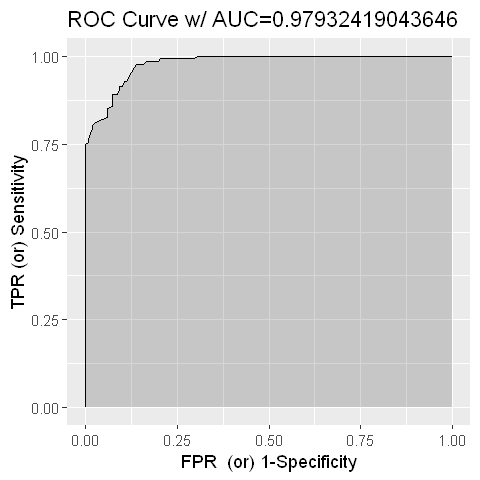

In [53]:
# Probabiliy of winning for each record
predicted_values <- predict(rf_final, test_data, type="prob")[,2] 

# Comparision between predictions and actuals, Finding No. of Positives and Negatives
pred <- prediction(predicted_values, test_data$gen_election_binary)

# x and y values to be used in the ROC curve plot
perf <- performance(pred, measure = "tpr", x.measure = "fpr")

auc <- performance(pred, measure = "auc")
auc <- auc@y.values[[1]]
roc.data <- data.frame(fpr=unlist(perf@x.values),
                       tpr=unlist(perf@y.values),
                       model="Random Forest")

options(repr.plot.width=4, repr.plot.height=4)
ggplot(roc.data, aes(x=fpr, ymin=0, ymax=tpr)) +
  geom_ribbon(alpha=0.2) +
  geom_line(aes(y=tpr)) +
  ggtitle(paste0("ROC Curve w/ AUC=", auc)) + 
  ylab("TPR (or) Sensitivity") +
  xlab("FPR  (or) 1-Specificity")

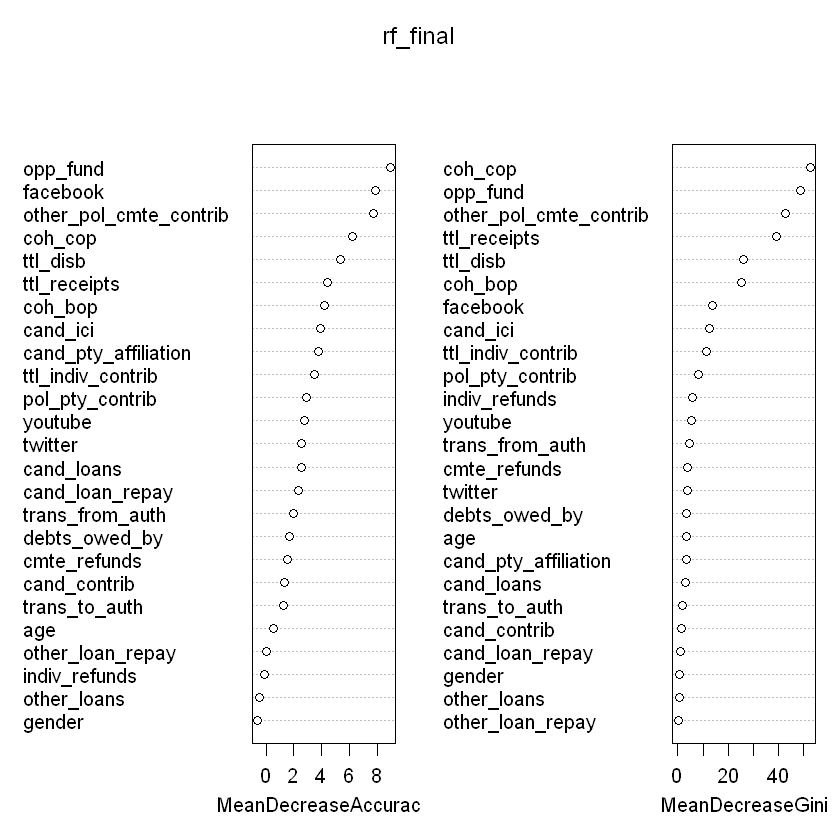

In [64]:
options(repr.plot.width=7, repr.plot.height=7)
varImpPlot(rf_final)

In [55]:
library(nnet)

Warning message:
"package 'nnet' was built under R version 3.5.2"

In [56]:
# Using Neural Network
ann <- nnet(gen_election ~ ., data=train_data, size=5, maxit=1000)

# weights:  206
initial  value 531.545575 
iter  10 value 185.061268
iter  20 value 184.825151
iter  30 value 184.820791
final  value 184.820779 
converged


In [57]:
summary(ann)

a 39-5-1 network with 206 weights
options were - entropy fitting 
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -0.21    0.58   -0.69   -0.32    0.11    0.64    0.37   -0.44   -0.25    0.22 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
   0.69    0.43   -0.63    0.55    0.48    0.27   -0.27   -0.65   -0.70    0.20 
i20->h1 i21->h1 i22->h1 i23->h1 i24->h1 i25->h1 i26->h1 i27->h1 i28->h1 i29->h1 
  -0.44    0.35   -0.26    0.06   -0.10    0.02   -0.51    0.06   -0.23   -0.68 
i30->h1 i31->h1 i32->h1 i33->h1 i34->h1 i35->h1 i36->h1 i37->h1 i38->h1 i39->h1 
  -0.43    0.07   -0.02    0.20    0.03    0.27    0.07    0.55    0.15    0.52 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -0.43   -0.33   -0.02    0.21   -0.07    0.69    0.67    0.15    0.39    0.05 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
  -0.43   -0.61    0.26    0.13   -0.59    

In [58]:
# For ANN, use type="raw" to get the probabilities
predicted_values <- predict(ann, test_data, type= "raw") 
head(predicted_values)

[,1]      
477 0.54238189
559 0.04230093
759 0.97820342
682 0.97820342
142 0.04230093
896 0.62976864

In [59]:
# If probability is > 0.5, then predict the outcome as W or else L.
threshold <- 0.5 
pred <- factor( ifelse(predicted_values[,1] > threshold, 1, 0) ) # We ask R to use the threshold and convert the probabilities to class labels (zero and one)
head(pred) # Let's look at the predicted class labels

477 559 759 682 142 896 
  1   0   1   1   0   1 
Levels: 0 1

In [60]:
levels(test_data$gen_election_binary)[2]

[1] "1"

In [61]:
confusionMatrix(pred
                , test_data$gen_election_binary
                , positive = levels(test_data$gen_election_binary)[2])

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 117   8
         1  34 119
                                          
               Accuracy : 0.8489          
                 95% CI : (0.8013, 0.8889)
    No Information Rate : 0.5432          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7004          
 Mcnemar's Test P-Value : 0.0001145       
                                          
            Sensitivity : 0.9370          
            Specificity : 0.7748          
         Pos Pred Value : 0.7778          
         Neg Pred Value : 0.9360          
             Prevalence : 0.4568          
         Detection Rate : 0.4281          
   Detection Prevalence : 0.5504          
      Balanced Accuracy : 0.8559          
                                          
       'Positive' Class : 1               
                                          

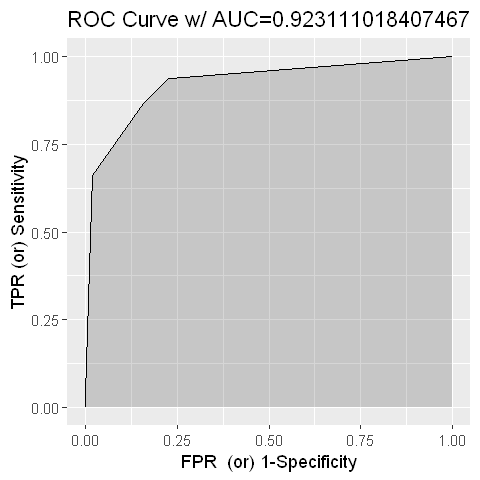

In [62]:
# Probabiliy of winning for each record
predicted_values <- predict(ann, test_data,type= "raw")

# Comparision between predictions and actuals, Finding No. of Positives and Negatives
pred <- prediction(predicted_values, test_data$gen_election_binary)

# x and y values to be used in the ROC curve plot
perf <- performance(pred, measure = "tpr", x.measure = "fpr")

auc <- performance(pred, measure = "auc")
auc <- auc@y.values[[1]]
roc.data <- data.frame(fpr=unlist(perf@x.values),
                       tpr=unlist(perf@y.values),
                       model="ANN")
options(repr.plot.width=4, repr.plot.height=4)
ggplot(roc.data, aes(x=fpr, ymin=0, ymax=tpr)) +
  geom_ribbon(alpha=0.2) +
  geom_line(aes(y=tpr)) +
  ggtitle(paste0("ROC Curve w/ AUC=", auc)) + 
ylab("TPR (or) Sensitivity") +
xlab("FPR  (or) 1-Specificity")

In [63]:
ann_free_size <- nnet(gen_election ~ ., data=train_data, size=25, maxit=1000)

ERROR: Error in nnet.default(x, y, w, entropy = TRUE, ...): too many (1026) weights


In [65]:
ann_max_size <- nnet(gen_election ~ ., data=train_data, size=24, maxit=1000)

# weights:  985
initial  value 676.155234 
iter  10 value 142.497378
iter  20 value 141.073089
iter  30 value 141.024477
iter  40 value 140.988125
iter  50 value 140.980050
final  value 140.980039 
converged


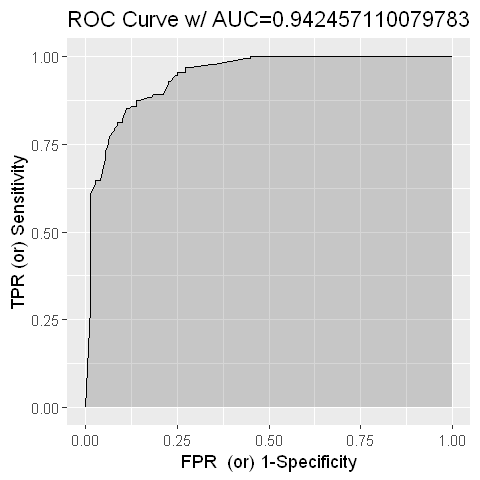

In [66]:
# Probabiliy of winning for each record
predicted_values <- predict(ann_max_size, test_data,type= "raw")

# Comparision between predictions and actuals, Finding No. of Positives and Negatives
pred <- prediction(predicted_values, test_data$gen_election_binary)

# x and y values to be used in the ROC curve plot
perf <- performance(pred, measure = "tpr", x.measure = "fpr")

auc <- performance(pred, measure = "auc")
auc <- auc@y.values[[1]]
roc.data <- data.frame(fpr=unlist(perf@x.values),
                       tpr=unlist(perf@y.values),
                       model="ANN Max Size")
options(repr.plot.width=4, repr.plot.height=4)
ggplot(roc.data, aes(x=fpr, ymin=0, ymax=tpr)) +
  geom_ribbon(alpha=0.2) +
  geom_line(aes(y=tpr)) +
  ggtitle(paste0("ROC Curve w/ AUC=", auc)) + 
ylab("TPR (or) Sensitivity") +
xlab("FPR  (or) 1-Specificity")

In [67]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.5.2"
Attaching package: 'dplyr'

The following object is masked from 'package:randomForest':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [68]:
#number of people who won with campaigns in all 3 social medias
all<-nrow(filter(data, twitter == 1 & facebook == 1 & youtube == 1 & gen_election == 'W'))
cat('Campaigns on all 3 and won : ', all, '\n')

#number of people who won with no campaigns in any of the 3 social medias
no<-nrow(filter(data, twitter == 0 & facebook == 0 & youtube == 0 & gen_election == 'W'))
cat('No Campaings and still won : ', no, '\n')

#number of people who won with campaigns in atleast 1 social medias
atleast1<-nrow(filter(data, (twitter == 1 | facebook == 1 | youtube == 1) & gen_election == 'W'))
cat('Campaigns on atleast 1 Social Media and won : ', atleast1, '\n')

#number of people who won with campaigns in atleast 2 social medias
atleast2<-nrow(filter(data, 
                      ((twitter == 1&facebook == 1) | 
                       (twitter == 1&youtube == 1) | 
                       (facebook == 1&youtube == 1)) 
                      & gen_election == 'W'))
cat('Campaigns on atleast 2 Social Media and won : ', atleast2, '\n')

#number of people who won with campaigns in twitter
twi<-nrow(filter(data, twitter == 1 & gen_election=='W'))
cat('Campaigns on Twitter and won : ', twi, '\n')

#number of people who won with campaigns in only twitter
twi_only<-nrow(filter(data, twitter == 1 & facebook == 0 & youtube == 0 & gen_election == 'W'))
cat('Campaigns on ONLY Twitter and won : ', twi_only, '\n')

#number of people who won with campaigns in facebook
fb<-nrow(filter(data, facebook == 1 & gen_election=='W'))
cat('Campaigns on Facebook and won : ', fb, '\n')

#number of people who won with campaigns in only facebook
fb_only<-nrow(filter(data, twitter == 0 & facebook == 1 & youtube == 0 & gen_election == 'W'))
cat('Campaigns on ONLY Facebook and won : ', fb_only, '\n')

#number of people who won with campaigns in youtube
yt<-nrow(filter(data, youtube == 1 & gen_election=='W'))
cat('Campaigns on Youtube and won : ', yt, '\n')

#number of people who won with campaigns in only youtube
yt_only<-nrow(filter(data, twitter == 0 & facebook == 0 & youtube == 1 & gen_election == 'W'))
cat('Campaigns on ONLY Youtube and won : ', yt_only, '\n')

#number of people who won with campaigns in twitter and facebook
t_fb<-nrow(filter(data, twitter == 1 & facebook == 1 & youtube == 0 & gen_election == 'W'))
cat('Campaigns on Twitter & Facebook and won : ', t_fb, '\n')

#number of people who won with campaigns in youtube and facebook
yt_fb<-nrow(filter(data, twitter == 0 & facebook == 1 & youtube == 1 & gen_election == 'W'))
cat('Campaigns on Facebook & Youtube and won : ', yt_fb, '\n')

#number of people who won with campaigns in twitter and youtube
t_yt<-nrow(filter(data, twitter == 1 & facebook == 0 & youtube == 1 & gen_election == 'W'))
cat('Campaigns on Twitter & Youtube and won : ', t_yt, '\n')

Warning message:
"package 'bindrcpp' was built under R version 3.5.2"

Campaigns on all 3 and won :  125 
No Campaings and still won :  137 
Campaigns on atleast 1 Social Media and won :  298 
Campaigns on atleast 2 Social Media and won :  217 
Campaigns on Twitter and won :  185 
Campaigns on ONLY Twitter and won :  17 
Campaigns on Facebook and won :  229 
Campaigns on ONLY Facebook and won :  38 
Campaigns on Youtube and won :  226 
Campaigns on ONLY Youtube and won :  26 
Campaigns on Twitter & Facebook and won :  17 
Campaigns on Facebook & Youtube and won :  49 
Campaigns on Twitter & Youtube and won :  26 


<h2>Best Social Media Platform to use for Election Campaign:</h2><br>
<b>Only 137 contestants won the election without any Social Media Campaigns. Meaning 298 of the 435 contestants who won, did campaigns in at least one of the social media. Hence I would recommend to create social media campaigns.
<br><br>
<span style="color:blue;">Facebook</span> is the best platform for social media campaign as 229 candidates have won with a social campaign in Facebook.
And campaigns ONLY in Facebook has made 38 candidates win which is better than campaigning only in Twitter or Youtube.</b>

In [69]:
# Finding the Number of Winning and Losing Contestants
summary(data$gen_election)

L   W 
494 435

In [70]:
# Frequency of Social Media Campaigns for different election results
ftable(xtabs(~gen_election+twitter, data=data))
ftable(xtabs(~gen_election+facebook, data=data))
ftable(xtabs(~gen_election+youtube, data=data))

             twitter   0   1
gen_election                
L                    480  14
W                    250 185

             facebook   0   1
gen_election                 
L                     481  13
W                     206 229

             youtube   0   1
gen_election                
L                    482  12
W                    209 226

In [71]:
# Does Money Buys Political Power?
# Money = Ending Cash - Beginning Cash
data$money <- (data$coh_cop - data$coh_bop)
summary(data$money)

#Classifying money into more and less with a threshold of 5000 which is greater than the mean of the Money
data$money <- ifelse(data$money > 5000, 1, 0)
data$money <- as.factor(data$money)
ftable(xtabs(~gen_election+money, data=data))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1542805    -1602      600     4641    26073  2141087 

             money   0   1
gen_election              
L                  377 117
W                  189 246

<h2>Money Buys Political Power:</h2><br>
<p><b>Calculated the Money spent by finding the difference between the two variables : Ending Cash (coh_cop) - Beginning Cash(coh_bop).

The Median of the amount spend is 4641. 

Seeing the statistics, 377 candidates lost the elections when the Money spent is less than 5000.

189 candidates have won without spending even 5000 and 246 candidates have won spending more than 500.

Therefore, we can generalize that Money buys Political Power.</b></p>

In [72]:
# Statistics of opp_fund variable
summary(data$opp_fund)
data$opp_fund_cat <- ifelse(data$opp_fund > 1500000, 1, 0)
ftable(xtabs(~gen_election+opp_fund_cat, data=data))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0   213317  1045759  1336783  1855008 18292250 

             opp_fund_cat   0   1
gen_election                     
L                         268 226
W                         355  80

<h2 style="color:red;">Prescriptions for a successful election Campaign:</h2>
<h3 style="color:blue;">Operation funds, Facebook campaigns, Contributions from Other Political Committees are important factors for a successful political campaign.</h3>